# Discovering the Structure of Higher Dimensional Data
## Jonathan Taylor

In this assignment, I use Apache Spark/PySpark and the Bridges2 supercomputer to answer the question: 

* What features can I discover in a 6-dimensional data set?

I use clustering and principal component analysis (PCA) to uncover various shapes hidden in the data and to discover their real dimensionality.

## PySpark Code

In [ ]:
rdd = sc.textFile("homework2.dat")
 
split_rdd = rdd.map(lambda x: x.split(","))

fl_rdd = split_rdd.map(lambda xs: [float(x) for x in xs])

df = spark.createDataFrame(fl_rdd)


cols = df.columns

from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = cols, outputCol = "features")
output_dat = assembler.transform(df).select("features")


# Unlike Python, Spark PCA doesn’t automatically scale data, we just center it here
scaler = StandardScaler(inputCol = "features", outputCol = "scaledFeatures", withStd = False, withMean = True)

# computes summary stats
scale_model = scaler.fit(output_dat)

# Normalize each feature to have unit SD
scaled_data = scale_model.transform(output_dat)


# Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score = []
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaledFeatures', metricName='silhouette', distance$

for i in range(2, 10):
        KMeans_algo=KMeans(featuresCol='scaledFeatures', k=i).setSeed(3)
        KMeans_fit=KMeans_algo.fit(scaled_data)
        output=KMeans_fit.transform(scaled_data)
        score=evaluator.evaluate(output)
        silhouette_score.append(score)
        print("Silhouette Score:", score)


# There is a drop-off in cost at k = 4. This, combined with the fact that there are four shapes after doing PCA on the 
# whole dataset, suggests that 4 is the optimal amount of clusters.

kmeans = KMeans().setK(4).setSeed(1)
model = kmeans.fit(scaled_data)
predictions = model.transform(scaled_data)


# Obtaining each cluster
predictions_0 = predictions.filter(predictions.prediction.contains("0")).drop("prediction")
predictions_1 = predictions.filter(predictions.prediction.contains("1")).drop("prediction")
predictions_2 = predictions.filter(predictions.prediction.contains("2")).drop("prediction")
predictions_3 = predictions.filter(predictions.prediction.contains("3")).drop("prediction")


pca = PCA(k=6, inputCol = scaler.getOutputCol(), outputCol="pcaFeatures")

import numpy as np

# Performing PCA on each cluster

# Zeroth Cluster
model_0 = pca.fit(predictions_0)
print("EV_0:", np.round(100*model_0.explainedVariance.toArray(), 4))
transformed_feature_0 = model_0.transform(predictions_0)
pc_0 = transformed_feature_0.select('pcaFeatures').rdd
pc_0 = pc_0.map(lambda row0: row0.pcaFeatures).collect()
clstr_0 = np.array(pc_0)
np.savetxt("0th_clstr.dat", clstr_0, delimiter=",")
# scp jtaylor7@bridges2.psc.edu:0th_clstr.dat /Users/Jonathan/Desktop/MSDAS/38611/Hw2/0th_clstr.dat

# First Cluster
model_1 = pca.fit(predictions_1)
print("EV_1:", np.round(100*model_1.explainedVariance.toArray(), 4))
transformed_feature_1 = model_1.transform(predictions_1)
pc_1 = transformed_feature_1.select('pcaFeatures').rdd
pc_1 = pc_1.map(lambda row1: row1.pcaFeatures).collect()
clstr_1 = np.array(pc_1)
np.savetxt("1st_clstr.dat", clstr_1, delimiter=",")
# scp jtaylor7@bridges2.psc.edu:1st_clstr.dat /Users/Jonathan/Desktop/MSDAS/38611/Hw2/1st_clstr.dat


# Second Cluster
model_2 = pca.fit(predictions_2)
print("EV_2:", np.round(100*model_2.explainedVariance.toArray(), 4))
transformed_feature_2 = model_2.transform(predictions_2)
pc_2 = transformed_feature_2.select('pcaFeatures').rdd
pc_2 = pc_2.map(lambda row2: row2.pcaFeatures).collect()
clstr_2 = np.array(pc_2)
np.savetxt("2nd_clstr.dat", clstr_2, delimiter=",")
# scp jtaylor7@bridges2.psc.edu:2nd_clstr.dat /Users/Jonathan/Desktop/MSDAS/38611/Hw2/2nd_clstr.dat


# Third Cluster
model_3 = pca.fit(predictions_3)
print("EV_3:", np.round(100*model_3.explainedVariance.toArray(), 4))
transformed_feature_3 = model_3.transform(predictions_3)
pc_3 = transformed_feature_3.select('pcaFeatures').rdd
pc_3 = pc_3.map(lambda row3: row3.pcaFeatures).collect()
clstr_3 = np.array(pc_3)
np.savetxt("3rd_clstr.dat", clstr_3, delimiter=",")
# scp jtaylor7@bridges2.psc.edu:3rd_clstr.dat /Users/Jonathan/Desktop/MSDAS/38611/Hw2/3rd_clstr.dat



### Plotting in Python once I took my PCA arrays from Spark to my Computer ############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


PCs_0 = pd.read_table("0th_clstr.dat", delimiter=",").to_numpy()
ax = plt.axes(projection="3d")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black') 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.scatter3D(PCs_0[:, 0],PCs_0[:, 1], PCs_0[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') 
plt.title("0th Cluster", color = 'black')
plt.colorbar()
plt.show()


PCs_1 = pd.read_table("1st_clstr.dat", delimiter=",").to_numpy()
ax = plt.axes(projection="3d")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black') 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.scatter3D(PCs_1[:, 0],PCs_1[:, 1], PCs_1[:, 2], cmap='ocean')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') 
plt.title("1st Cluster", color = 'black')
plt.colorbar()
plt.show()


PCs_2 = pd.read_table("2nd_clstr.dat", delimiter=",").to_numpy()
ax = plt.axes(projection="3d")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black') 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.scatter3D(PCs_2[:, 0],PCs_2[:, 1], PCs_2[:, 2], cmap='ocean')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') 
plt.title("2nd Cluster", color = 'black')
plt.colorbar()
plt.show()


PCs_3 = pd.read_table("3rd_clstr.dat", delimiter=",").to_numpy()
ax = plt.axes(projection="3d")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black') 
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.scatter3D(PCs_3[:, 0],PCs_3[:, 1], PCs_3[:, 2], cmap='ocean')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3') 
plt.title("3rd Cluster", color = 'black')
plt.colorbar()
plt.show()

### Figure 1

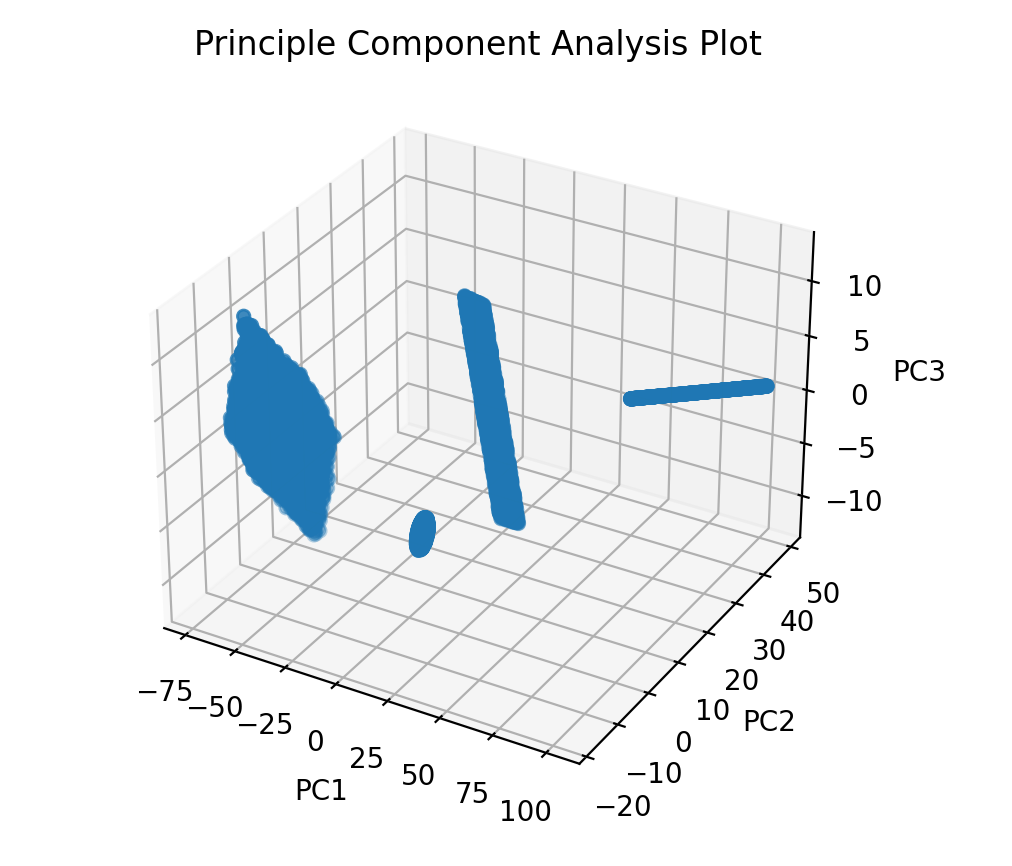

At first, I did PCA on the entire dataset and found the shapes shown in the above Figure 1. It shows how PCA on the entire dataset reduced everything to 2-D. Then I went back and did clustering, using 4 clusters (1 for each shape), and ran PCA on each of the individual cluster and plotted. I also printed the explained variances of each cluster.

### Figure 2

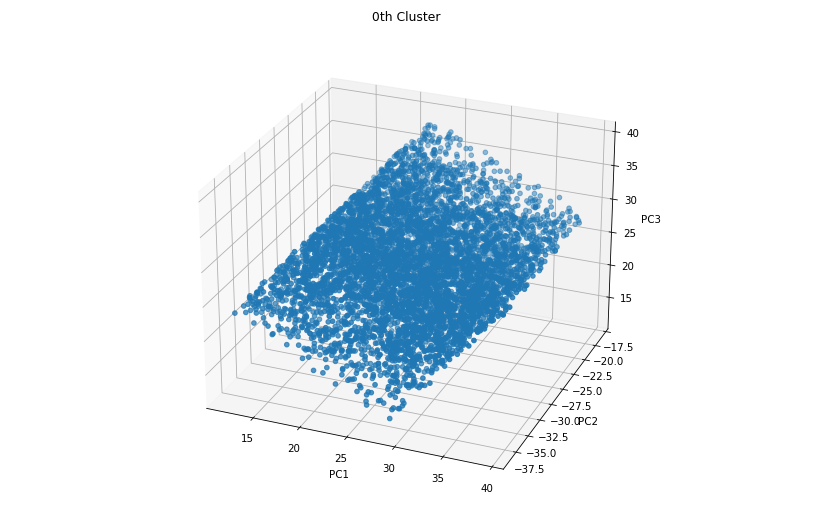

The cuboid shape shown in Figure 2 appears to be 3-dimensional as all of the data is explained with the first 3 principal components. This explains why it looked like a 2-D parallelogram in Figure_1 and like a cuboid when plotted in 3-D.

### Figure 3

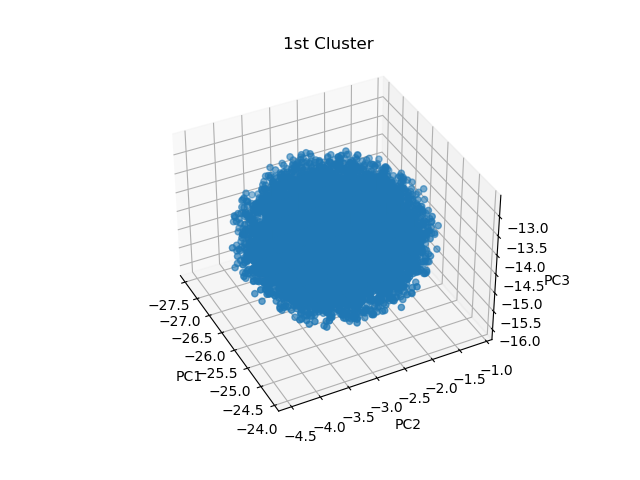

The spherical-looking shape shown in Figure 3 actually appears to be 5-dimensional as all of the variance is explained within the first 5 principal components. It looked like a flat circle in Figure_1 because running PCA on the entire dataset reduced everything to 2D. And it looks like a sphere in 3D because in 3D, only the first 3 principal are visualized, so some data are being left out.

### Figure 4

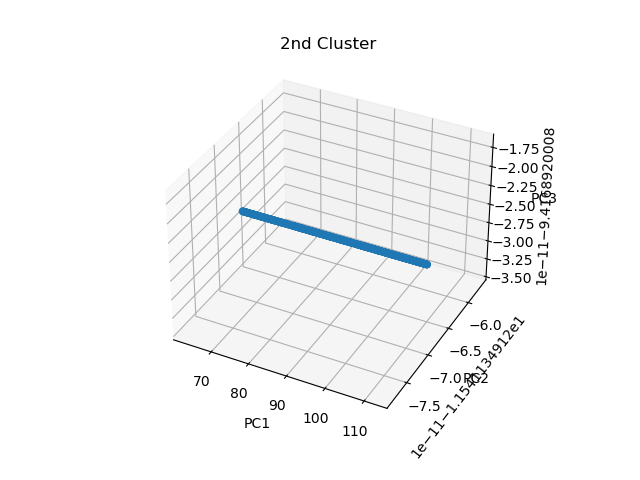

The line shown in Figure 4 is a 1-D line. 100% of the variance is explained by the first principal component, and this explains why this line looks the same whether it’s plotted in 2-D or 3-D. No data are being left out and none of the subsequent principal components contribute anything.

### Figure 5

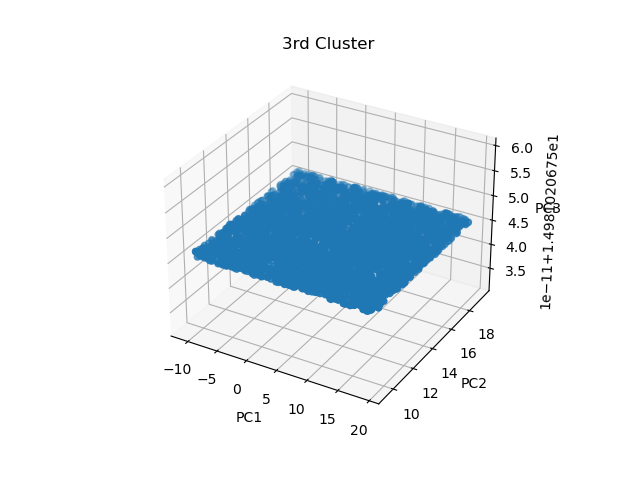

Lastly, the plane shown in Figure 5 is a 2-D plane since 100% of the variance is explained within the first 2 principal components. So it still looks like a plane in 2-D and any higher dimension.

In conclusion, running PCA on the entire dataset reduced everything to 2-D and therefore could not account for the differences between each data (shape). Running PCA on each shape (cluster) allowed for a more detailed exploration of each shape and what their true structures are. The parallelogram is actually a 3-D cuboid, the circle is actually a 5-D object, the 1-D line really is a 1-D line, and the 2-D plane really is a 2-D plane.